In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
# 1.Load the dataset and explore the variables.
data=pd.read_csv("C:/Users/e.sansebastian/OneDrive - EXPONDO/Ironhack/Weeks/Week_3/Day_5/Morning/lab-imbalanced-data/files_for_lab/customer_churn.csv")

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
display(data.shape)
display(data.describe())
display(data.info())

(7043, 21)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

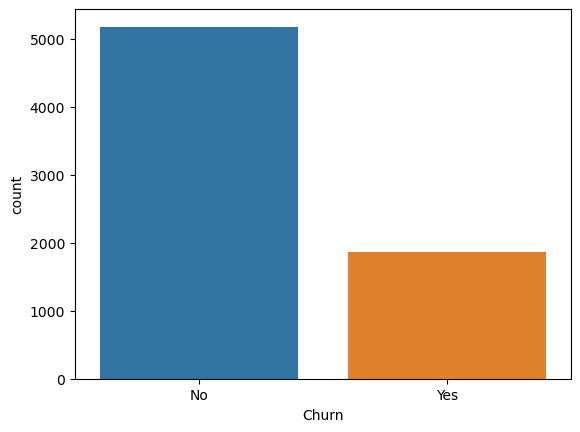

Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64

The class imbalance ratio is: 0.47


In [6]:
# We plot the column churn, which is the one we want to predict. On the plot we can see a clear class imbalance for the No option.
sns.countplot(x='Churn', data=data);
plt.show()
display(data["Churn"].value_counts()/len(data["Churn"]))
count_classes = data['Churn'].value_counts()
print("The class imbalance ratio is: {:.2f}".format((count_classes[0]-count_classes[1])/(count_classes[0]+count_classes[1])))



In [7]:
# Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')
X = data[["tenure","SeniorCitizen","MonthlyCharges"]]
y = data['Churn']

In [8]:
X["SeniorCitizen"].value_counts(dropna=False)

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

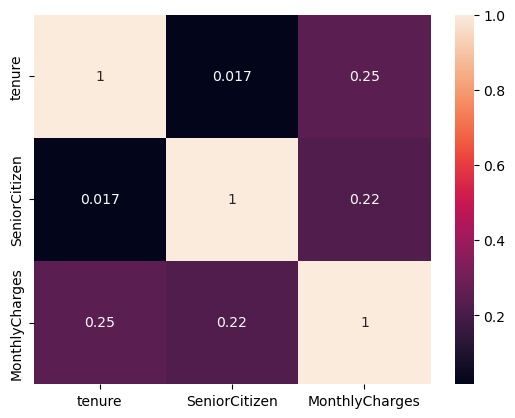

In [9]:
# We plot the corr matrix to see the relationship among columns.
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()
#There seems not to be a high correlation among the variables.

In [10]:
# 4. Build the logistic regression model.

# here we start scaling, so need to do train-test-split before
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
import pickle
import os
from sklearn.preprocessing import MinMaxScaler

# Since the column SeniorCitizen is ranged between 0 and 1 I have chosen the MinMax scaler to transform the data:
scaler = MinMaxScaler()
scaler.fit(X_train) # For every column values z = (x - mean(x_train))/sd(x_train)

path = "scalers/"
isExist = os.path.exists(path)
if not isExist:
  
    os.makedirs(path)
    print("The new directory is created!")

filename = "MinMaxImbalance.pkl" 
with open(path+filename, "wb") as file:
    pickle.dump(scaler, file) 

X_train_scaled_np = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
# because this is the only tranformation we apply to the numerics, (there are no categorical features in the df)
# we can immediately transform the X_test as well
X_test_scaled_np = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
3296,0.333333,0.0,0.309263
6397,0.750000,1.0,0.468127
6043,0.041667,0.0,0.218127
5309,0.847222,0.0,0.019920
3000,0.166667,0.0,0.659363


In [12]:
# 5.Evaluate the model.

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))

The accuracy of the model in the TEST set is: 0.78


In [14]:
#6. Even a simple model will give us more than 70% accuracy. Why?

# My assumption is that the accuracy of over 70% (%78 to be more precise) is because the dataset has a clear high imbalance,
# which is leading to get more values on the "No" option. It correctly predicts a large amount of values for the "No"
# option


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test, y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test, y_pred_test, pos_label='Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test, y_pred_test, pos_label='Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test, y_pred_test, pos_label='Yes')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))


The accuracy in the TEST set is: 0.78
The precision in the TEST set is: 0.62
The recall in the TEST set is: 0.45
The F1 in the TEST set is: 0.52
The Kappa in the TEST set is: 0.39


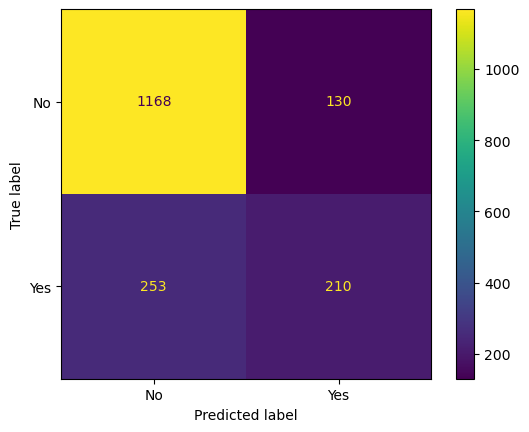

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [18]:
# 7. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. 
#Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=100,k_neighbors=3)

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [19]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5282, 3)
(7752, 3)


In [20]:
y_train_SMOTE.value_counts()

Churn
No     3876
Yes    3876
Name: count, dtype: int64

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_smote = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_smote)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_smote,pos_label='Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_smote,pos_label='Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_smote,pos_label='Yes')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_smote)))

The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.48
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.58
The Kappa in the TEST set is: 0.38


In [ ]:
# As it could be expected the accuracy decreased after applying the SMOTE to try to solve the class imbalance.
# Precision dropped as well, indicating that the model is now less accurate predicting the positive class.

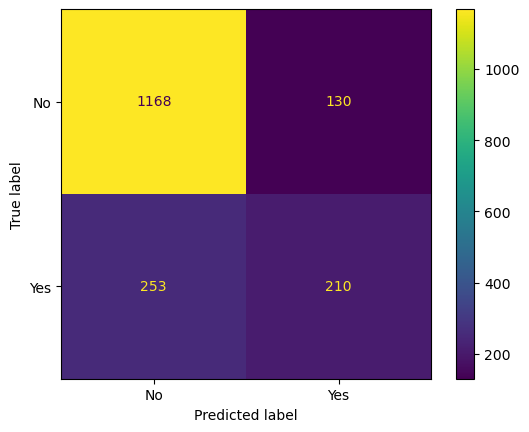

In [22]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
#Insights after the smote:

# Before SMOTE, the model's performance was affected by class imbalance,high number of "No" leading to a relatively high accuracy but lower recall.

# After SMOTE Recall improved significantly, suggesting better identification of instances of churn. However, precision decreased, indicating more false positives.